# 《人工神经网络理论、设计及应用》代码实践-第二章 神经网络基础知识
<hr>

#### 本章程序所需python包

可以在命令行的conda环境下逐个pip install xxx安装，也可以用pip install -r requirements.txt一次全部安装

```
numpy
matplotlib
PyQt5==5.13
PySide2
icecream
networkx
scikit-learn
```

### 2.2 人工神经元模型

#### Page26 公式$o_j=f(W_j^TX)$

- 人工神经元模型将单个生物神经元的输入输出关系简化为：
  - 多个输入、一个输出。
  - 从输入到形成输出只经过：加权求和（包括与阈值相减）、输出函数处理两个阶段。
  - 在“加权求和”阶段，每个输入被乘上一个权重，然后加在一起与神经元阈值（通常也称为偏置值）比较（相减），按照相对阈值的大小，形成正、负、零三大类情况。
  - 上面结果再被一个“输出函数”（这个函数通常是非线性函数）处理为神经元输出结果。
  - 输入、输出的计算公式为：$f(\sum_{i=0}^nW_i*X_i-\theta)$，W代表权重向量，X代表输入向量，$\theta$代表神经元阈值，$f(x)$代表输出函数

In [26]:
# 人工神经元计算的简单性：只需要加减、乘法和逻辑判断就能实现神经元从输入到输出的全部计算

def sign(x):
    return 1 if x>=0 else 0

W1=1
W2=2
X1=2
X2=4
bias=0.1

# 计算阶段1-加权求和
out=W1*X1+W2*X2-bias #每个输入分量X(i)乘以各自权重W(i)后相加，再用减法与偏置（神经元阈值）bias比较大小
print("W1*X1+W2*X2-bias=",out)
# 计算阶段2-非线性输出函数
print("输出函数（这里以阶跃函数为例）处理后输出：",sign(out))
print("--------------------------------------------------")

W1*X1+W2*X2-bias= 9.9
输出函数（这里以阶跃函数为例）处理后输出： 1
--------------------------------------------------


#### 改用python程序中的numpy包的数组和点积运算实现上述程序中算法

In [27]:
# 扩展，使用numpy数组表达输入、权重，权重、输入的维度、数量变化不带来程序的复杂化和改写。
# 下面程序中权重、输入的注释行可以替换未注释行，程序支持多种输入、权重组合，虽然权重或输入的数量发生了变化，但输出计算并不用改写。（在权重、输入向量的维度一致时，维度数量变化同样不用修改计算程序。）

import numpy as np
def sign(x):
    return np.array(x>0,dtype=int)

W=np.array([1,2]) #将权重W视为2维向量
#W=np.array([[1,2],[2,3]])
X=np.array([2,4]) #将输入视为2维向量
#X=np.array([[2,4],[3,5],[4,6]])
bias=0.1

out=np.dot(W,X.T)-bias #每个输入分量与其权重相乘求和，就等同于求输入、权重向量的点积，这里使用numpy的dot运算。
print("W*X-bias=",out)
print("输出函数（这里以阶跃函数为例）处理后输出：",sign(out))
print("--------------------------------------------------")

W*X-bias= 9.9
输出函数（这里以阶跃函数为例）处理后输出： 1
--------------------------------------------------


#### Page26 2.2.3神经元的转移函数

神经元的输出函数（也称为转移函数、激活函数）
- 阈值型转移函数

<center>单极性阈值型</center>
$$
sign(x)=\begin{cases}
1,&x>=0 \\ 0,&x<0
\end{cases}
$$

<center>双极性阈值型</center>
$$
sign(x)=\begin{cases}
1,&x>=0 \\-1,&x<0
\end{cases}
$$


- 非线性转移函数
  <center>单极性S函数</center>
  $$f(x)=\left.\frac{1}{1+e^{-x}}\right.$$
  <center>双极性S函数</center>
  $$f(x)=\left.\frac{1-e^{-x}}{1+e^{-x}}\right.$$
- 分段线性转移函数(ReLU的一个变体，带有最大值限幅)
$$
f(x)=\begin{cases}
0,&x=<0\\cx,&0<x=<x_c\\1,&x_c><x
\end{cases}
$$

- 概率型转移函数
    $$P(1)=\left.\frac{1}{1-e^{-x/T}}\right.$$

#### 可视化比较几种输出函数（修改自《深度学习入门-基于python的理论与实现》书中代码）

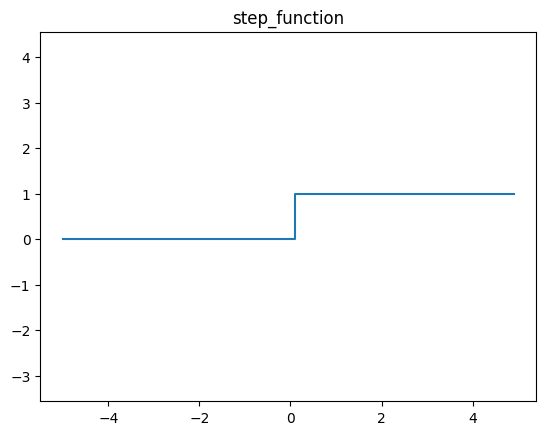

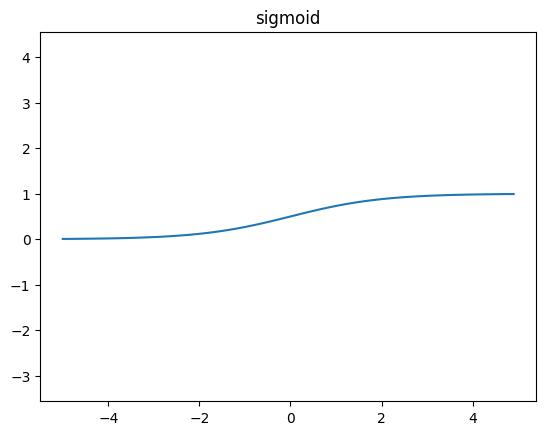

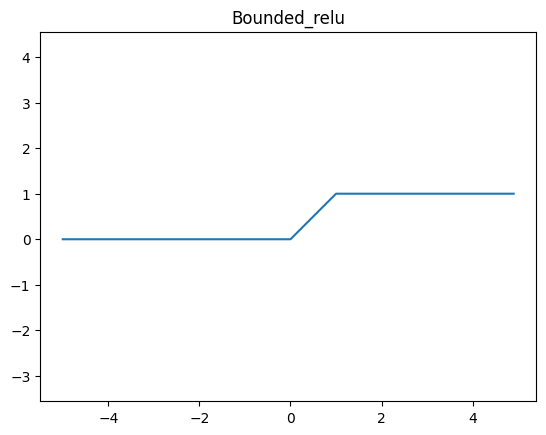

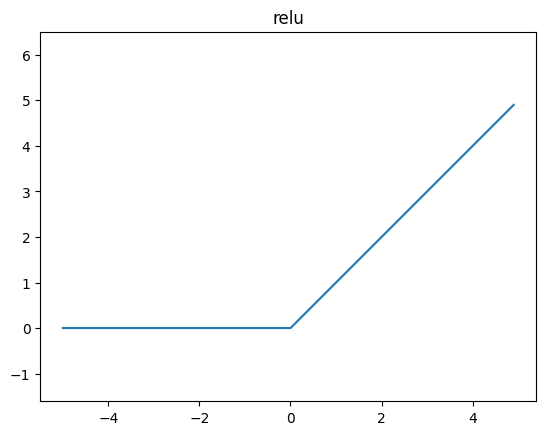

各函数比较


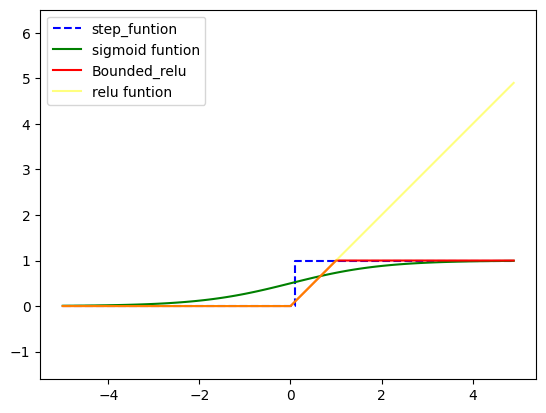

In [28]:
# 延展实践代码,可视化比较几种输出函数（修改自《深度学习入门-基于python的理论与实现》书中代码）

import numpy as np
import matplotlib.pylab as plt

# 单极性阈值函数
def step_function(x):
    return np.array(x>=0,dtype=int)

# 单极性S函数
def sigmoid(x):
    return 1/(1+np.exp(-x))

# 分段性函数
def relu(x):
    return np.maximum(0,x)

def Bounded_relu(x):
    return np.minimum(np.maximum(0,x),1)

# 输出层激活函数，转换每个孤立输出为相对各输出总和百分比，为了适应负数、零对未来求导的影响、更显著彼此差异，进一步加工为指数函数方式，并加入了防溢出计算：-c
def softmax(a):
    c=np.max(a)
    exp_a=np.exp(a-c)
    sum_exp_a=np.sum(exp_a)
    y=exp_a/sum_exp_a
    return y
    

x=np.arange(-5.0,5.0,0.1)
#x = np.concatenate((np.arange(-5.0, 0, 0.1), [0], np.arange(0.1, 5.0, 0.1)))

y1=step_function(x)
plt.title("step_function")
#plt.plot(x,y1)
plt.plot(x, y1, drawstyle='steps-post')  # 使用'steps-post'以确保阶跃发生在数据点之后
plt.ylim(-0.1,4.0)
plt.axis('equal')
plt.show()

y2=sigmoid(x)
plt.title("sigmoid")
plt.plot(x,y2)
plt.ylim(-0.1,6.0)
plt.axis('equal')
plt.show()

y3=Bounded_relu(x)
plt.title("Bounded_relu")
plt.plot(x,y3)
plt.ylim(-2.,6.0)
plt.axis('equal')
plt.show()

y4=relu(x)
plt.title("relu")
plt.plot(x,y4)
plt.ylim(-2.,6.0)
plt.axis('equal')
plt.show()

print("各函数比较")
#plt.plot(x,y1,color='blue',linestyle="--",label='step_funtion')
plt.plot(x, y1, color='blue',linestyle="--",label='step_funtion',drawstyle='steps-post')  # 使用'steps-post'以确保阶跃发生在数据点之后
plt.plot(x,y2,color='green',label='sigmoid funtion')
plt.plot(x,y3,color='red',label='Bounded_relu')
plt.plot(x,y4,color='yellow',label='relu funtion',alpha=0.5)
plt.ylim(-2,6.)
plt.legend()
plt.axis('equal')
plt.show()

### 2.5 神经网络学习规则

学习规则-权值更新依据

- W代表权重，$W_{t0}$代表网络在t0时刻的权重
- $\delta W$代表权重调整增量
- X代表输入向量
- $d_j$代表学习信号（由网络输出和指导信号经过处理获得）

$$W_{t+1}=W_{t}+\delta W_{t+1}$$

$$\delta W_{j}=\eta*r[W_{j}(t),X(t),d_j(t)]*X(t)$$


#### Page33 例2.1 Hebb学习规则

In [2]:
# Page33 例2.1计算过程的代码实现（双极性离散函数）

import numpy as np
#from icecream import ic

eta=1 #学习率
bias=0 #阈值T，因为等于0,所以后序计算点积后本应相减，但并未出现
W0=np.array([1,-1,0,0.5])
X1=np.array([1,-2,1.5,0])
X2=np.array([1,-0.5,-2,-1.5])
X3=np.array([0,1,-1,1.5])

net1=np.dot(W0,X1) #省略了与阈值T（也就是bias）的相减，以下类似计算中相同不再重复注释
print('net1=',net1)
W1=W0+eta*np.sign(net1)*X1
print('W1=',W1)
print("---------------------------------------")

net2=np.dot(W1,X2)
print('net2=',net2)
W2=W1+eta*np.sign(net2)*X2
print('W2=',W2)
print("---------------------------------------")


net3=np.dot(W2,X3)
print('net3=',net3)
W3=W2+eta*np.sign(net3)*X3
print('W3=',W3)
print("---------------------------------------")


net1= 3.0
W1= [ 2.  -3.   1.5  0.5]
---------------------------------------
net2= -0.25
W2= [ 1.  -2.5  3.5  2. ]
---------------------------------------
net3= -3.0
W3= [ 1.  -3.5  4.5  0.5]
---------------------------------------


In [3]:
# Page33 例2.1 双极性连续函数

import numpy as np
from icecream import ic

# 设置小数点后的位数为2
np.set_printoptions(precision=3)

def bipolar_continuous_function(x):
    return np.round((1 - np.exp(-x)) / (1 + np.exp(-x)), decimals=3)
eta=1
W0=np.array([1,-1,0,0.5])
X1=np.array([1,-2,1.5,0])
X2=np.array([1,-0.5,-2,-1.5])
X3=np.array([0,1,-1,1.5])

net1=np.dot(W0,X1)
print(f"net1={net1:.3f}")
o1=bipolar_continuous_function(net1)
print("o1=",o1)
W1=W0+eta*o1*X1
print("W1=",np.round(W1,decimals=4))
print("----------------------------------------------------")

net2=np.dot(W1,X2)
print(f"net2={net2:.3f}")
o2=bipolar_continuous_function(net2)
print("o2=",o2)
W2=W1+eta*o2*X2
print("W2=",np.round(W2,decimals=4))
print("----------------------------------------------------")

net3=np.dot(W2,X3)
print(f"net3={net3:.3f}")
o3=bipolar_continuous_function(net3)
print("o3=",o3)
W3=W2+eta*o3*X3
print("W3=",np.round(W3,decimals=4))

net1=3.000
o1= 0.905
W1= [ 1.905 -2.81   1.357  0.5  ]
----------------------------------------------------
net2=-0.155
o2= -0.077
W2= [ 1.828 -2.772  1.512  0.616]
----------------------------------------------------
net3=-3.360
o3= -0.933
W3= [ 1.828 -3.704  2.445 -0.784]


#### Page34 2.5.2 Perceptron感知器学习规则在AND、OR、NAND逻辑学习中的代码实现

In [4]:
# 处理AND、OR、NAND逻辑对输入数据空间的线性可分类响应（补充了偏置项的更新）

import numpy as np
#from icecream import ic

np.set_printoptions(precision=3)

def sgn(x):
    return 1 if x>=0 else -1

eta=0.1 #学习率

#网络初始参数
W0=np.array([0,0]) #权重
bias=0.0 #偏置

# 输入数据集
X1=np.array([0,0])
X2=np.array([0,1])
X3=np.array([1,0])
X4=np.array([1,1])

# 期望输出
Y=np.array([-1,-1,-1,1]) # AND逻辑
#Y=np.array([-1,1,1,1]) # OR逻辑
#Y=np.array([1,1,1,-1]) # NAND逻辑

o1=sgn(np.dot(W0,X1)+bias)
# Perceptron学习规则开始
r1=Y[0]-o1 #学习信号
deltaW=eta*r1*X1 #权值增量计算公式
# Perceptron学习规则结束，得到本次权值调整增量deltaW
W1=W0+deltaW #权值调整
bias+=eta*r1 #偏置调整，因为将偏置视为输入恒为1的输入分量,所以看似用了与权值增量计算的不同公式，其实是省略了乘以恒为1的计算项
print(f"Input: {X1}, Expected Output: {Y[0]}, Net Output: {o1}, Error: {r1}")
print(f"Delta W: {deltaW}, Updated Weights: {W1}")
print(f"Delta B: {eta*r1}, Updated Bias: {bias:.2f}")
print("------------------------------------------")

o2=sgn(np.dot(W1,X2)+bias)
r2=Y[1]-o2
deltaW=eta*r2*X2
W2=W1+deltaW
bias+=eta*r2
print(f"Input: {X2}, Expected Output: {Y[1]}, Net Output: {o2}, Error: {r2}")
print(f"Delta W: {deltaW}, Updated Weights: {W2}")
print(f"Delta B: {eta*r2}, Updated Bias: {bias:.2f}")
print("------------------------------------------")

o3=sgn(np.dot(W2,X3)+bias)
r3=Y[2]-o3
deltaW=eta*r3*X3
W3=W2+deltaW
bias+=eta*r3
print(f"Input: {X3}, Expected Output: {Y[2]}, Net Output: {o3}, Error: {r3}")
print(f"Delta W: {deltaW}, Updated Weights: {W3}")
print(f"Delta B: {eta*r3}, Updated Bias: {bias:.2f}")
print("------------------------------------------")

o4=sgn(np.dot(W3,X4)+bias)
r4=Y[3]-o4
deltaW=eta*r4*X4
W4=W3+deltaW
bias+=eta*r4
print(f"Input: {X4}, Expected Output: {Y[3]}, Net Output: {o4}, Error: {r4}")
print(f"Delta W: {deltaW}, Updated Weights: {W4}")
print(f"Delta B: {eta*r4}, Updated Bias: {bias:.2f}")
print("------------------------------------------")

Input: [0 0], Expected Output: -1, Net Output: 1, Error: -2
Delta W: [-0. -0.], Updated Weights: [0. 0.]
Delta B: -0.2, Updated Bias: -0.20
------------------------------------------
Input: [0 1], Expected Output: -1, Net Output: -1, Error: 0
Delta W: [0. 0.], Updated Weights: [0. 0.]
Delta B: 0.0, Updated Bias: -0.20
------------------------------------------
Input: [1 0], Expected Output: -1, Net Output: -1, Error: 0
Delta W: [0. 0.], Updated Weights: [0. 0.]
Delta B: 0.0, Updated Bias: -0.20
------------------------------------------
Input: [1 1], Expected Output: 1, Net Output: -1, Error: 2
Delta W: [0.2 0.2], Updated Weights: [0.2 0.2]
Delta B: 0.2, Updated Bias: 0.00
------------------------------------------


#### 验证-连续运用学习规则更新权重、偏置的程序，验证学习规则的有效性,以处理AND、OR、NAND逻辑的线性可分响应为例

In [5]:
# 连续运用学习规则更新权重、偏置的程序，验证学习规则的有效性,以处理AND、OR、NAND逻辑的线性可分响应为例
import numpy as np

def sgn(x):
    return np.array(x >= 0, dtype=int) * 2 - 1  # 输出为1或-1

# 初始化参数
eta = 0.1  # 学习率
W = np.array([0, 0])  # 初始权重
b = 0  # 初始偏置
X = np.array([
    [0, 0],  # X1
    [0, 1],  # X2
    [1, 0],  # X3
    [1, 1]   # X4
])
Y = np.array([-1, -1, -1, 1])  # AND逻辑的期望输出
# 如果需要使用OR或NAND逻辑，请取消下面相应的行注释，并注释掉上面的Y定义。
#Y = np.array([-1, 1, 1, 1])  # OR逻辑的期望输出
#Y = np.array([1, 1, 1, -1])  # NAND逻辑的期望输出


def predict(x, W, b):
    """根据当前权重和偏置计算预测值"""
    net_input = np.dot(W, x) + b
    return sgn(net_input)

def update_weights_and_bias(W, b, eta, error, x):
    """根据误差和学习率更新权重和偏置"""
    deltaW = eta * error * x
    deltaB = eta * error
    return W + deltaW, b + deltaB

iteration = 0
max_iterations = 1000  # 设置最大迭代次数以防止无限循环

while True:
    all_correct = True
    for i in range(len(X)):
        x = X[i]
        y = Y[i]
        o = predict(x, W, b)
        r = y - o
        
        if r != 0:  # 如果存在误差，则更新权重和偏置
            all_correct = False
            W, b = update_weights_and_bias(W, b, eta, r, x)
        
        print(f"Iteration {iteration}, Sample {i+1}:")
        print(f"Input: {x}, Expected Output: {y}, Net Output: {o}, Error: {r}")
        print(f"Delta W: {eta*r*x}, Updated Weights: {W}")
        print(f"Delta B: {eta*r}, Updated Bias: {b:.2f}")
        print("------------------------------------------")
    
    iteration += 1
    
    if all_correct or iteration >= max_iterations:
        break

# 测试阶段：检查所有输入的实际输出是否符合期望输出
print("Testing Results:")
for i in range(len(X)):
    x = X[i]
    y = Y[i]
    o = predict(x, W, b)
    print(f"Input: {x}, Expected Output: {y}, Actual Output: {o}")

if all(predict(x, W, b) == y for x, y in zip(X, Y)):
    print("All tests passed!")
else:
    print("Some tests failed.")

Iteration 0, Sample 1:
Input: [0 0], Expected Output: -1, Net Output: 1, Error: -2
Delta W: [-0. -0.], Updated Weights: [0. 0.]
Delta B: -0.2, Updated Bias: -0.20
------------------------------------------
Iteration 0, Sample 2:
Input: [0 1], Expected Output: -1, Net Output: -1, Error: 0
Delta W: [0. 0.], Updated Weights: [0. 0.]
Delta B: 0.0, Updated Bias: -0.20
------------------------------------------
Iteration 0, Sample 3:
Input: [1 0], Expected Output: -1, Net Output: -1, Error: 0
Delta W: [0. 0.], Updated Weights: [0. 0.]
Delta B: 0.0, Updated Bias: -0.20
------------------------------------------
Iteration 0, Sample 4:
Input: [1 1], Expected Output: 1, Net Output: -1, Error: 2
Delta W: [0.2 0.2], Updated Weights: [0.2 0.2]
Delta B: 0.2, Updated Bias: 0.00
------------------------------------------
Iteration 1, Sample 1:
Input: [0 0], Expected Output: -1, Net Output: 1, Error: -2
Delta W: [-0. -0.], Updated Weights: [0.2 0.2]
Delta B: -0.2, Updated Bias: -0.20
------------------

#### Page35 例2.2 $\Delta$ Delta学习规则的代码实现

In [6]:
# 补充-Page35 例2.2计算过程的代码实现

import numpy as np
from icecream import ic # 便于输出调试信息的包

np.set_printoptions(precision=3, suppress=True)  # suppress=True 防止科学记数法

def bipolar_continuous_function(x):
    return np.round((1 - np.exp(-x)) / (1 + np.exp(-x)), decimals=3)

def derivative_of_f(x):
    return  np.round(0.5*(1-x**2),decimals=3)
    
eta=0.1
X1=np.array([-1,1,-2,0])
X2=np.array([-1,0,1.5,-0.5])
X3=np.array([-1,-1,1,0.5])
d1=-1
d2=-1
d3=1
W0=np.array([0.5,1,-1,0])

net1=np.dot(W0,X1)
ic(f"{net1:.3f}")
o1=bipolar_continuous_function(net1)
ic(o1)
df_o1=derivative_of_f(o1)
ic(df_o1)
W1=W0+eta*(d1-o1)*df_o1*X1
print('W1=',W1)

net2=np.dot(W1,X2)
ic(f"{net2:.3f}")
o2=bipolar_continuous_function(net2)
ic(o2)
df_o2=derivative_of_f(o2)
ic(df_o2)
W2=W1+eta*(d2-o2)*df_o2*X2
print('W2=',W2)

net3=np.dot(W2,X3)
ic(f"{net3:.3f}")
o3=bipolar_continuous_function(net3)
ic(o3)
df_o3=derivative_of_f(o3)
ic(df_o3)
W3=W2+eta*(d3-o3)*df_o3*X3
print('W3=',W3)

ic| f"{net1:.3f}": '2.500'
ic| o1: 0.848
ic| df_o1: 0.14
ic| f"{net2:.3f}": '-1.948'
ic| o2: -0.751
ic| df_o2: 0.218
ic| f"{net3:.3f}": '-2.460'
ic| o3: -0.843
ic| df_o3: 0.145


W1= [ 0.526  0.974 -0.948  0.   ]
W2= [ 0.531  0.974 -0.956  0.003]
W3= [ 0.505  0.947 -0.93   0.016]


#### Page36 2.5.6 Winner-Take-All（胜者为王）学习规则可视化

In [8]:
# 补充-Page36 2.5.6 Winner-Take-All（胜者为王）学习规则可视化
# 在本节，请忽略这个程序的具体实现写法，而关注于获胜神经元的权值更新和对输入数据空间数据集合的分工动画

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import networkx as nx
from sklearn.decomposition import PCA

# 如果在Jupyter Notebook中使用，请取消注释以下行并选择合适的后端
%matplotlib qt5  
# 或者使用其他后端如 %matplotlib notebook

# 参数设置
num_neurons = 5  # 神经元数量
input_dim = 2    # 输入维度
learning_rate = 0.1  # 学习率
max_frames = 50   # 动画的最大帧数

# 初始化权重
weights = np.random.rand(num_neurons, input_dim)

# 创建随机输入数据
def generate_random_input():
    return np.random.rand(input_dim)

# WTA规则选择最活跃的神经元
def get_winner_neuron_index(inputs):
    activations = np.dot(weights, inputs)
    return np.argmax(activations)

# 更新获胜神经元的权重
def update_winner_weight(winner_index, inputs):
    global weights
    winner_weight = weights[winner_index]
    weights[winner_index] = (winner_weight + learning_rate * (inputs - winner_weight))
    weights[winner_index] /= np.linalg.norm(weights[winner_index])  # 归一化

# 设置绘图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 绘制网络图
G = nx.DiGraph()
for i in range(input_dim):
    G.add_node(f'Input_{i}', pos=(0, i), color='blue')
for i in range(num_neurons):
    G.add_node(f'Neuron_{i}', pos=(1, i), color='green')

# 初始化边和权重
edges = []
for neuron_idx in range(num_neurons):
    for input_idx in range(input_dim):
        edge = G.add_edge(f'Input_{input_idx}', f'Neuron_{neuron_idx}', weight=weights[neuron_idx][input_idx])
        edges.append((f'Input_{input_idx}', f'Neuron_{neuron_idx}'))

pos = nx.get_node_attributes(G, 'pos')
colors = [data[1]['color'] for data in G.nodes(data=True)]

# 预计算PCA（如果需要）
if input_dim > 2:
    pca = PCA(n_components=2)
else:
    pca = None

# 数据点和激活神经元索引记录
data_points = []
neuron_indices = []

# 动画更新函数
def update(frame):
    global weights
    
    inputs = generate_random_input()
    winner_index = get_winner_neuron_index(inputs)
    
    #print(f"Frame {frame}: Activated Neuron Index: {winner_index}")
    
    # 只更新获胜神经元的权重
    update_winner_weight(winner_index, inputs)
    
    # 更新网络图的边权重
    for edge in edges:
        neuron_idx = int(edge[1].split('_')[1])
        input_idx = int(edge[0].split('_')[1])
        G.edges[edge]['weight'] = weights[neuron_idx][input_idx]
    
    # 更新颜色以反映激活状态
    colors = [node[1]['color'] if not (node[0].startswith('Neuron') and int(node[0].split('_')[1]) == winner_index) else 'red' for node in G.nodes(data=True)]
    
    # 清除旧图并重新绘制网络图
    ax1.clear()
    nx.draw(G, pos, node_color=colors, with_labels=True, ax=ax1, edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red', ax=ax1)
    
    # 记录数据点和激活的神经元
    data_points.append(inputs)
    neuron_indices.append(winner_index)
    
    # 可视化数据点
    ax2.clear()
    ax2.set_title('Input Data Points Colored by Activating Neuron')
    if pca is not None:
        data_2d = pca.fit_transform(data_points)
    else:
        data_2d = np.array(data_points)
    
    colors_data = ['red', 'green', 'blue', 'yellow', 'purple'][:num_neurons]
    for neuron_idx in set(neuron_indices):
        mask = np.array(neuron_indices) == neuron_idx
        ax2.scatter(data_2d[mask, 0], data_2d[mask, 1], c=colors_data[neuron_idx], label=f'Neuron {neuron_idx}')
    
    ax2.legend()

# 初始化第一帧
update(0)

# 创建动画
ani = FuncAnimation(fig, update, frames=max_frames, blit=False)

plt.show()

### 额外

#### 两个向量点积的几何可视化

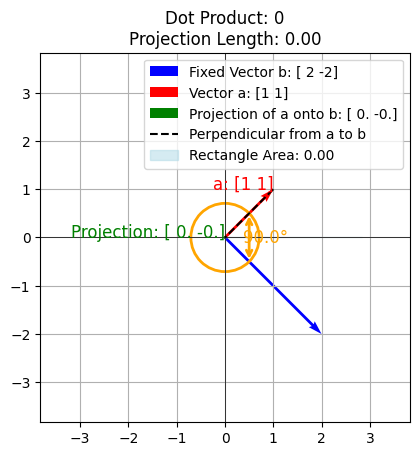

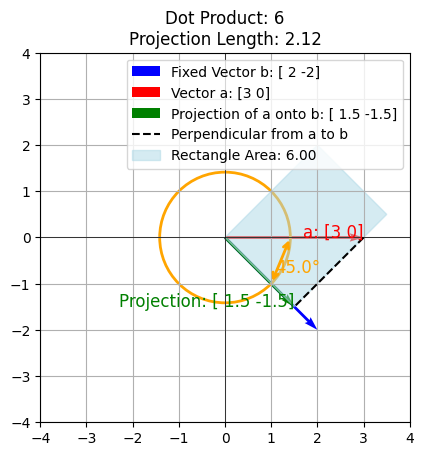

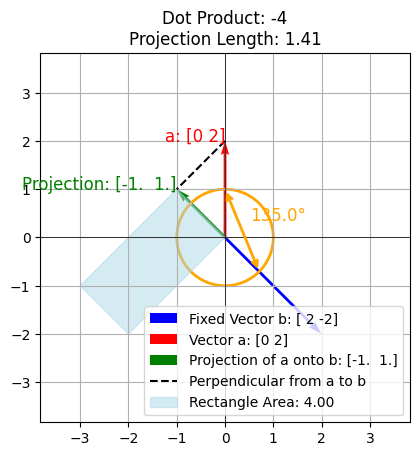

In [1]:
# 不同角度与一个固定向量点积的可视化，红蓝箭头是两个向量，绿色的是一个向量在固定值向量（或其延长线）上的投影，淡蓝色的矩形是一个向量与另外一个向量在其上投影的乘积（点积值）

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

#在Windows10下，如果需要使用matplotlib的pyplot显示中文可以取消以下语句注释
#plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
#plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

def plot_dot_product_and_projection(a, b):
    # 创建图形和坐标轴
    fig, ax = plt.subplots()
    
    # 设置坐标轴范围
    max_limit = max(np.linalg.norm(a), np.linalg.norm(b)) + 1
    ax.set_xlim([-max_limit, max_limit])
    ax.set_ylim([-max_limit, max_limit])
    
    # 绘制固定向量b
    ax.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='b', label=f'Fixed Vector b: {b}')
    
    # 计算向量a在向量b上的投影
    projection_a_on_b = (np.dot(a, b) / np.linalg.norm(b)**2) * b
    
    # 绘制向量a及其投影
    ax.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='r', label=f'Vector a: {a}')
    ax.quiver(0, 0, projection_a_on_b[0], projection_a_on_b[1], angles='xy', scale_units='xy', scale=1, color='g', label=f'Projection of a onto b: {projection_a_on_b}')
    
    # 计算点积
    dot_product = np.dot(a, b)
    
    # 计算夹角（弧度）
    cos_theta = dot_product / (np.linalg.norm(a) * np.linalg.norm(b))
    theta_rad = np.arccos(np.clip(cos_theta, -1.0, 1.0))  # 避免数值误差导致arccos出错
    theta_deg = np.degrees(theta_rad)  # 转换为角度
    
    # 绘制夹角的弧线
    angle_start = np.arctan2(b[1], b[0])  # 向量b的角度
    angle_end = np.arctan2(a[1], a[0])    # 向量a的角度
    
    arc_radius = 0.5 * min(np.linalg.norm(a), np.linalg.norm(b))  # 弧线半径
    arc = plt.Circle((0, 0), arc_radius, color='none', ec='orange', lw=2)
    ax.add_patch(arc)
    ax.annotate('', xy=(arc_radius * np.cos(angle_start), arc_radius * np.sin(angle_start)),
                xytext=(arc_radius * np.cos(angle_end), arc_radius * np.sin(angle_end)),
                arrowprops=dict(arrowstyle='<->', color='orange', lw=2))
    
    # 在弧线中间标注角度值
    mid_angle = (angle_start + angle_end) / 2
    ax.text(arc_radius * 1.2 * np.cos(mid_angle), arc_radius * 1.2 * np.sin(mid_angle),
            f'{theta_deg:.1f}°', color='orange', fontsize=12, ha='center', va='center')
    
    # 绘制垂线（从a的终点到投影点）
    ax.plot([a[0], projection_a_on_b[0]], [a[1], projection_a_on_b[1]], 'k--', label='Perpendicular from a to b')
    
    # 绘制矩形
    # 矩形的一条边与投影向量对齐，另一条边的长度为固定向量b的长度
    len_b = np.linalg.norm(b)
    len_proj = np.linalg.norm(projection_a_on_b)
    
    # 找到与投影向量垂直的单位向量
    if projection_a_on_b[0] != 0:
        perpendicular_vector = np.array([-projection_a_on_b[1], projection_a_on_b[0]]) / np.linalg.norm(projection_a_on_b)
    else:
        perpendicular_vector = np.array([1, 0])  # 如果投影向量平行于y轴，则取x轴作为垂直方向
    
    # 将垂直向量缩放到固定向量b的长度
    perpendicular_scaled = len_b * perpendicular_vector
    
    # 定义矩形四个顶点的位置
    rectangle_points = [
        [0, 0],
        [projection_a_on_b[0], projection_a_on_b[1]],
        [projection_a_on_b[0] + perpendicular_scaled[0], projection_a_on_b[1] + perpendicular_scaled[1]],
        [perpendicular_scaled[0], perpendicular_scaled[1]],
        [0, 0]
    ]
    
    # 将这些点转换为NumPy数组，并绘制填充区域
    rectangle_points = np.array(rectangle_points)
    ax.fill(rectangle_points[:, 0], rectangle_points[:, 1], color='lightblue', alpha=0.5, label=f'Rectangle Area: {abs(dot_product):.2f}')
    
    # 添加注释
    ax.text(a[0], a[1], f'a: {a}', color='r', fontsize=12, ha='right')
    ax.text(projection_a_on_b[0], projection_a_on_b[1], f'Projection: {projection_a_on_b}', color='g', fontsize=12, ha='right')
    
    # 设置图形属性
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.grid(True)
    ax.set_aspect('equal')
    ax.legend()
    
    # 显示图形
    plt.title(f'Dot Product: {dot_product}\nProjection Length: {len_proj:.2f}')
    plt.show()

# 固定向量b
b = np.array([2, -2])  # 固定向量b

# 动态改变向量a
a_values = [
    np.array([1, 1]),  # 向量a1
    np.array([3, 0]),  # 向量a2
    np.array([0, 2]),  # 向量a3
]

# 对每个a绘制图形
for a in a_values:
    plot_dot_product_and_projection(a, b)

#### 单个神经元多维输入到一维输出映射的可视化

In [4]:
# 单个神经元多维输入到一维输出映射的可视化，图中虚线、在权值向量及其延长线上的红点是各输入向量的投影。

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
%matplotlib qt5

# 定义10个固定的输入向量
vectors = np.array([
    [1, 2], [3, 4], [-1, -2],
    [2, -1], [-3, 2], [4, 3],
    [-2, 1], [1, -3], [-4, -3],
    [0, 5]
])

# 创建图形和子图
fig = plt.figure(figsize=(15, 10))

# 调整子图位置，确保上部有足够的空间
ax1 = fig.add_axes([0.1, 0.4, 0.35, 0.5], projection='3d')  # 3D 子图
ax2 = fig.add_axes([0.55, 0.4, 0.35, 0.5])  # 1D 子图

# 设置初始权值和偏置
initial_weights = [0.5, 0.5]  # 仅使用二维权值
initial_bias = 0.0

# 绘制超平面和向量投影的函数
def update_plot(weights, bias):
    ax1.clear()
    ax2.clear()

    weights = np.array(weights)
    w1, w2 = weights

    # 创建超平面
    xx, yy = np.meshgrid(range(-5, 6), range(-5, 6))
    zz = (-w1 * xx - w2 * yy - bias) / 1.0  # 假设 z 方向权重为 1

    # 绘制超平面
    ax1.plot_surface(xx, yy, zz, alpha=0.2, color='lightblue')

    # 绘制权值向量作为线段
    ax1.quiver(0, 0, 0, w1, w2, 1, color='magenta', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector')

    # 绘制权值向量方向两端的延长黑色细实线
    scale = 10  # 延长线的长度
    ax1.plot([-scale * w1, scale * w1], [-scale * w2, scale * w2], [-scale * 1, scale * 1], 'k-', lw=1, label='Weight Direction')

    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维

        # 计算投影
        proj_scalar = (np.dot(v, [w1, w2, 1]) + bias) / (w1**2 + w2**2 + 1)
        proj = proj_scalar * np.array([w1, w2, 1])

        # 绘制向量和投影
        ax1.scatter(*proj, color='r', s=100)  # 投影点
        ax1.plot([0, v[0]], [0, v[1]], [0, v[2]], 'b-', lw=2, label=f'Vector {i+1}' if i == 0 else "")  # 向量
        ax1.plot([v[0], proj[0]], [v[1], proj[1]], [v[2], proj[2]], 'k--')  # 垂线

        # 标记向量
        ax1.text(v[0], v[1], v[2], f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]', color='blue', fontsize=10, ha='right')

    ax1.set_xlim([-5, 5])
    ax1.set_ylim([-5, 5])
    ax1.set_zlim([-5, 5])
    ax1.set_xlabel('X axis')
    ax1.set_ylabel('Y axis')
    ax1.set_zlabel('Z axis')
    ax1.set_title('Vectors projected onto the hyperplane')
    ax1.legend(loc='upper right')

    # 更新一维映射子图
    mapped_values = np.dot(vectors, weights) + bias  # 使用二维权值进行映射
    ax2.scatter(mapped_values, np.zeros_like(mapped_values), color='g', s=100)
    ax2.axhline(y=0, color='k', linestyle='--')

    # 固定 0 点位置
    ax2.axvline(x=0, color='r', linestyle='-', lw=1)  # 红色竖线表示 0 点
    ax2.set_xlim([-10, 10])  # 固定 x 轴范围
    ax2.set_title('Vectors mapped to a one-dimensional number line')
    ax2.set_yticks([])

    # 标记映射值
    for i, value in enumerate(mapped_values):
        ax2.text(value, 0, f'V{i+1}: {value:.1f}', color='green', fontsize=10, ha='center', va='bottom')

    fig.canvas.draw_idle()

# 更新权重和偏置时调用此函数
def update(val):
    weights = [s_w1.val, s_w2.val]
    bias = s_bias.val
    update_plot(weights, bias)

# 创建滑块
axcolor = 'lightgoldenrodyellow'

# 滑块放置在图形下部，垂直方向占用三分之一的空间
ax_w1 = plt.axes([0.1, 0.25, 0.35, 0.03], facecolor=axcolor)
ax_w2 = plt.axes([0.1, 0.20, 0.35, 0.03], facecolor=axcolor)
ax_bias = plt.axes([0.1, 0.15, 0.35, 0.03], facecolor=axcolor)

s_w1 = Slider(ax_w1, 'Weight 1', -5.0, 5.0, valinit=initial_weights[0])
s_w2 = Slider(ax_w2, 'Weight 2', -5.0, 5.0, valinit=initial_weights[1])
s_bias = Slider(ax_bias, 'Bias', -5.0, 5.0, valinit=initial_bias)

# 连接滑块的更新事件
s_w1.on_changed(update)
s_w2.on_changed(update)
s_bias.on_changed(update)

# 初始绘制
update_plot(initial_weights, initial_bias)

plt.show()

#### 同层（处理同一输入数据集的）多个神经元对于多维输入的多维输出映射可视化

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

# 定义10个固定的输入向量
vectors = np.array([
    [1, 2], [3, 4], [-1, -2],
    [2, -1], [-3, 2], [4, 3],
    [-2, 1], [1, -3], [-4, -3],
    [1, 5]
])

# 创建图形和子图
fig = plt.figure(figsize=(20, 12))

# 调整子图位置，确保上部有足够的空间
ax1 = fig.add_axes([0.1, 0.4, 0.35, 0.5])  # 二维空间映射子图
ax2 = fig.add_axes([0.55, 0.4, 0.35, 0.5], projection='3d')  # 输入数据空间 3D 子图

# 设置初始权值和偏置
initial_weights1 = [0.5, 0.5]  # 第一组权值
initial_bias1 = 0.0  # 第一组偏置
initial_weights2 = [-0.5, 0.5]  # 第二组权值
initial_bias2 = 0.0  # 第二组偏置

# 绘制二维映射和 3D 超平面投影的函数
def update_plot(weights1, bias1, weights2, bias2):
    ax1.clear()
    ax2.clear()

    # 计算第一组映射（作为 x 轴）
    mapped_x = np.dot(vectors, weights1) + bias1
    # 计算第二组映射（作为 y 轴）
    mapped_y = np.dot(vectors, weights2) + bias2

    # 绘制二维空间中的点
    ax1.scatter(mapped_x, mapped_y, color='blue', s=100)
    ax1.axhline(y=0, color='k', linestyle='--')  # 水平 0 线
    ax1.axvline(x=0, color='k', linestyle='--')  # 垂直 0 线

    # 设置坐标轴范围
    ax1.set_xlim([-10, 10])
    ax1.set_ylim([-10, 10])
    ax1.set_xlabel('Group 1 Mapping (X axis)')
    ax1.set_ylabel('Group 2 Mapping (Y axis)')
    ax1.set_title('2D Mapping of Vectors')
    ax1.set_aspect('equal')  # 设置等比例轴

    # 标记每个点的坐标
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        ax1.text(x, y, f'V{i+1}: ({x:.1f}, {y:.1f})', color='red', fontsize=10, ha='right')

    # 在输入数据空间中绘制 3D 超平面和投影
    w1_1, w2_1 = weights1  # 第一组权值
    bias1 = bias1  # 第一组偏置
    w1_2, w2_2 = weights2  # 第二组权值
    bias2 = bias2  # 第二组偏置

    # 创建网格数据
    xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))

    # 绘制第一组超平面
    zz1 = (-w1_1 * xx - w2_1 * yy - bias1) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz1, alpha=0.5, color='lightblue', label='Hyperplane 1')

    # 绘制第二组超平面
    zz2 = (-w1_2 * xx - w2_2 * yy - bias2) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz2, alpha=0.5, color='lightgreen', label='Hyperplane 2')

    # 绘制输入向量
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        ax2.scatter(v[0], v[1], v[2], color='blue', s=100)
        ax2.text(v[0], v[1], v[2], f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]', color='blue', fontsize=10, ha='right')

    # 绘制第一组权值向量及其延长线
    scale = 10  # 延长线的长度
    ax2.quiver(0, 0, 0, w1_1, w2_1, 1, color='magenta', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 1')
    ax2.plot([-scale * w1_1, scale * w1_1], [-scale * w2_1, scale * w2_1], [-scale * 1, scale * 1], 'k--', lw=1, label='Weight Direction 1')

    # 绘制第二组权值向量及其延长线
    ax2.quiver(0, 0, 0, w1_2, w2_2, 1, color='orange', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 2')
    ax2.plot([-scale * w1_2, scale * w1_2], [-scale * w2_2, scale * w2_2], [-scale * 1, scale * 1], 'k:', lw=1, label='Weight Direction 2')

    # 绘制输入向量在第一组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar1 = (np.dot(v, [w1_1, w2_1, 1]) + bias1) / (w1_1**2 + w2_1**2 + 1)
        proj1 = proj_scalar1 * np.array([w1_1, w2_1, 1])
        ax2.plot([v[0], proj1[0]], [v[1], proj1[1]], [v[2], proj1[2]], 'k--', lw=1)  # 垂线
        ax2.scatter(proj1[0], proj1[1], proj1[2], color='red', s=100)  # 投影点

    # 绘制输入向量在第二组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar2 = (np.dot(v, [w1_2, w2_2, 1]) + bias2) / (w1_2**2 + w2_2**2 + 1)
        proj2 = proj_scalar2 * np.array([w1_2, w2_2, 1])
        ax2.plot([v[0], proj2[0]], [v[1], proj2[1]], [v[2], proj2[2]], 'k:', lw=1)  # 垂线
        ax2.scatter(proj2[0], proj2[1], proj2[2], color='purple', s=100)  # 投影点

    ax2.set_xlim([-5, 5])
    ax2.set_ylim([-5, 5])
    ax2.set_zlim([-5, 5])
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_zlabel('Z axis')
    ax2.set_title('Input Space: 3D Hyperplanes and Projections')
    ax2.legend(loc='upper right')
    ax2.set_box_aspect([1, 1, 1])  # 设置等比例轴

    fig.canvas.draw_idle()

# 更新权重和偏置时调用此函数
def update(val):
    weights1 = [s_w1_1.val, s_w2_1.val]
    bias1 = s_bias1.val
    weights2 = [s_w1_2.val, s_w2_2.val]
    bias2 = s_bias2.val
    update_plot(weights1, bias1, weights2, bias2)

# 创建滑块
axcolor = 'lightgoldenrodyellow'

# 第一组滑块（左侧下部）
ax_w1_1 = plt.axes([0.1, 0.25, 0.35, 0.03], facecolor=axcolor)
ax_w2_1 = plt.axes([0.1, 0.20, 0.35, 0.03], facecolor=axcolor)
ax_bias1 = plt.axes([0.1, 0.15, 0.35, 0.03], facecolor=axcolor)

# 第二组滑块（右侧下部）
ax_w1_2 = plt.axes([0.55, 0.25, 0.35, 0.03], facecolor=axcolor)
ax_w2_2 = plt.axes([0.55, 0.20, 0.35, 0.03], facecolor=axcolor)
ax_bias2 = plt.axes([0.55, 0.15, 0.35, 0.03], facecolor=axcolor)

s_w1_1 = Slider(ax_w1_1, 'Weight 1 (Group 1)', -5.0, 5.0, valinit=initial_weights1[0])
s_w2_1 = Slider(ax_w2_1, 'Weight 2 (Group 1)', -5.0, 5.0, valinit=initial_weights1[1])
s_bias1 = Slider(ax_bias1, 'Bias (Group 1)', -5.0, 5.0, valinit=initial_bias1)
s_w1_2 = Slider(ax_w1_2, 'Weight 1 (Group 2)', -5.0, 5.0, valinit=initial_weights2[0])
s_w2_2 = Slider(ax_w2_2, 'Weight 2 (Group 2)', -5.0, 5.0, valinit=initial_weights2[1])
s_bias2 = Slider(ax_bias2, 'Bias (Group 2)', -5.0, 5.0, valinit=initial_bias2)

# 连接滑块的更新事件
s_w1_1.on_changed(update)
s_w2_1.on_changed(update)
s_bias1.on_changed(update)
s_w1_2.on_changed(update)
s_w2_2.on_changed(update)
s_bias2.on_changed(update)

# 初始绘制
update_plot(initial_weights1, initial_bias1, initial_weights2, initial_bias2)

plt.show()

#### XOR问题输入数据集被两个神经元分别处理后，各自输出形成的2维数据空间映射可视化

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

# 定义4个固定的输入向量
vectors = np.array([
    [0, 0], [0, 1], [1, 0],
    [1, 1]
])

# 创建图形和子图
fig = plt.figure(figsize=(20, 10))  # 增加图形高度以容纳滑块
ax1 = fig.add_subplot(121)  # 二维空间映射子图
ax2 = fig.add_subplot(122, projection='3d')  # 输入数据空间 3D 子图

# 设置初始权值和偏置
initial_weights1 = [0.5, 0.5]  # 第一组权值
initial_bias1 = 0.0  # 第一组偏置
initial_weights2 = [-0.5, 0.5]  # 第二组权值
initial_bias2 = 0.0  # 第二组偏置

# 调整子图布局，避免滑块遮挡
plt.subplots_adjust(left=0.1, right=0.95, bottom=0.3, top=0.9, wspace=0.3)

# 绘制二维映射和 3D 超平面投影的函数
def update_plot(weights1, bias1, weights2, bias2):
    ax1.clear()
    ax2.clear()

    # 计算第一组映射（作为 x 轴）
    mapped_x = np.dot(vectors, weights1) + bias1
    # 计算第二组映射（作为 y 轴）
    mapped_y = np.dot(vectors, weights2) + bias2

    # 绘制二维空间中的点
    scatter = ax1.scatter(mapped_x, mapped_y, color='blue', s=100)
    ax1.axhline(y=0, color='k', linestyle='--')  # 水平 0 线
    ax1.axvline(x=0, color='k', linestyle='--')  # 垂直 0 线

    # 设置坐标轴范围并保持等比例
    ax1.set_xlim([-5, 5])
    ax1.set_ylim([-5, 5])
    ax1.set_aspect('equal')  # 保持 X、Y 轴等比例
    ax1.set_xlabel('Group 1 Mapping (X axis)')
    ax1.set_ylabel('Group 2 Mapping (Y axis)')
    ax1.set_title('2D Mapping of Vectors')

    # 标记每个点的坐标
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        ax1.text(x, y, f'V{i+1}: ({x:.1f}, {y:.1f})', color='red', fontsize=10, ha='right')

    # 添加图例，显示输入向量名称及原始值
    legend_labels = [f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]' for i, v in enumerate(vectors)]
    ax1.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)] * len(vectors),
               labels=legend_labels, title="Input Vectors", loc="upper left")

    # 在输入数据空间中绘制 3D 超平面和投影
    w1_1, w2_1 = weights1  # 第一组权值
    bias1 = bias1  # 第一组偏置
    w1_2, w2_2 = weights2  # 第二组权值
    bias2 = bias2  # 第二组偏置

    # 创建网格数据
    xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))

    # 绘制第一组超平面
    zz1 = (-w1_1 * xx - w2_1 * yy - bias1) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz1, alpha=0.5, color='lightblue', label='Hyperplane 1')

    # 绘制第二组超平面
    zz2 = (-w1_2 * xx - w2_2 * yy - bias2) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz2, alpha=0.5, color='lightgreen', label='Hyperplane 2')

    # 绘制输入向量
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        ax2.scatter(v[0], v[1], v[2], color='blue', s=100)
        ax2.text(v[0], v[1], v[2], f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]', color='blue', fontsize=10, ha='right')

    # 绘制第一组权值向量及其延长线
    scale = 10  # 延长线的长度
    ax2.quiver(0, 0, 0, w1_1, w2_1, 1, color='magenta', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 1')
    ax2.plot([-scale * w1_1, scale * w1_1], [-scale * w2_1, scale * w2_1], [-scale * 1, scale * 1], 'k--', lw=1, label='Weight Direction 1')

    # 绘制第二组权值向量及其延长线
    ax2.quiver(0, 0, 0, w1_2, w2_2, 1, color='orange', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 2')
    ax2.plot([-scale * w1_2, scale * w1_2], [-scale * w2_2, scale * w2_2], [-scale * 1, scale * 1], 'k:', lw=1, label='Weight Direction 2')

    # 绘制输入向量在第一组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar1 = (np.dot(v, [w1_1, w2_1, 1]) + bias1) / (w1_1**2 + w2_1**2 + 1)
        proj1 = proj_scalar1 * np.array([w1_1, w2_1, 1])
        ax2.plot([v[0], proj1[0]], [v[1], proj1[1]], [v[2], proj1[2]], 'k--', lw=1)  # 垂线
        ax2.scatter(proj1[0], proj1[1], proj1[2], color='red', s=100)  # 投影点

    # 绘制输入向量在第二组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar2 = (np.dot(v, [w1_2, w2_2, 1]) + bias2) / (w1_2**2 + w2_2**2 + 1)
        proj2 = proj_scalar2 * np.array([w1_2, w2_2, 1])
        ax2.plot([v[0], proj2[0]], [v[1], proj2[1]], [v[2], proj2[2]], 'k:', lw=1)  # 垂线
        ax2.scatter(proj2[0], proj2[1], proj2[2], color='purple', s=100)  # 投影点

    ax2.set_xlim([-5, 5])
    ax2.set_ylim([-5, 5])
    ax2.set_zlim([-5, 5])
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_zlabel('Z axis')
    ax2.set_title('Input Space: 3D Hyperplanes and Projections')
    ax2.legend(loc='upper right')

    fig.canvas.draw_idle()

# 更新权重和偏置时调用此函数
def update(val):
    weights1 = [s_w1_1.val, s_w2_1.val]
    bias1 = s_bias1.val
    weights2 = [s_w1_2.val, s_w2_2.val]
    bias2 = s_bias2.val
    update_plot(weights1, bias1, weights2, bias2)

# 创建滑块
axcolor = 'lightgoldenrodyellow'
# 第一组滑块（居左）
ax_w1_1 = plt.axes([0.1, 0.1, 0.35, 0.03], facecolor=axcolor)
ax_w2_1 = plt.axes([0.1, 0.05, 0.35, 0.03], facecolor=axcolor)
ax_bias1 = plt.axes([0.1, 0.0, 0.35, 0.03], facecolor=axcolor)
# 第二组滑块（居右）
ax_w1_2 = plt.axes([0.55, 0.1, 0.35, 0.03], facecolor=axcolor)
ax_w2_2 = plt.axes([0.55, 0.05, 0.35, 0.03], facecolor=axcolor)
ax_bias2 = plt.axes([0.55, 0.0, 0.35, 0.03], facecolor=axcolor)

s_w1_1 = Slider(ax_w1_1, 'Weight 1 (Group 1)', -5.0, 5.0, valinit=initial_weights1[0])
s_w2_1 = Slider(ax_w2_1, 'Weight 2 (Group 1)', -5.0, 5.0, valinit=initial_weights1[1])
s_bias1 = Slider(ax_bias1, 'Bias (Group 1)', -5.0, 5.0, valinit=initial_bias1)
s_w1_2 = Slider(ax_w1_2, 'Weight 1 (Group 2)', -5.0, 5.0, valinit=initial_weights2[0])
s_w2_2 = Slider(ax_w2_2, 'Weight 2 (Group 2)', -5.0, 5.0, valinit=initial_weights2[1])
s_bias2 = Slider(ax_bias2, 'Bias (Group 2)', -5.0, 5.0, valinit=initial_bias2)

# 连接滑块的更新事件
s_w1_1.on_changed(update)
s_w2_1.on_changed(update)
s_bias1.on_changed(update)
s_w1_2.on_changed(update)
s_w2_2.on_changed(update)
s_bias2.on_changed(update)

# 初始绘制
update_plot(initial_weights1, initial_bias1, initial_weights2, initial_bias2)

plt.show()

#### 多层神经元数据映射的可视化

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

# 定义4个固定的输入向量
vectors = np.array([
    [0, 0], [0, 1], [1, 0],
    [1, 1]
])

# 创建图形和子图
fig = plt.figure(figsize=(25, 10))  # 增加图形高度以容纳滑块
ax1 = fig.add_subplot(131)  # 二维空间映射子图
ax2 = fig.add_subplot(132, projection='3d')  # 输入数据空间 3D 子图
ax3 = fig.add_subplot(133)  # 第三组权重和偏置的 2D 子图

# 设置初始权值和偏置
initial_weights1 = [0.5, 0.5]  # 第一组权值
initial_bias1 = 0.0  # 第一组偏置
initial_weights2 = [-0.5, 0.5]  # 第二组权值
initial_bias2 = 0.0  # 第二组偏置
initial_weights3 = [0.5, -0.5]  # 第三组权值
initial_bias3 = 0.0  # 第三组偏置

# 调整子图布局，避免滑块遮挡
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.3, top=0.9, wspace=0.3)

# 绘制二维映射和 3D 超平面投影的函数
def update_plot(weights1, bias1, weights2, bias2, weights3, bias3):
    ax1.clear()
    ax2.clear()
    ax3.clear()

    # 计算第一组映射（作为 x 轴）
    mapped_x = np.dot(vectors, weights1) + bias1
    # 计算第二组映射（作为 y 轴）
    mapped_y = np.dot(vectors, weights2) + bias2

    # 绘制二维空间中的点
    scatter = ax1.scatter(mapped_x, mapped_y, color='blue', s=100)
    ax1.axhline(y=0, color='k', linestyle='--')  # 水平 0 线
    ax1.axvline(x=0, color='k', linestyle='--')  # 垂直 0 线

    # 设置坐标轴范围并保持等比例
    ax1.set_xlim([-5, 5])
    ax1.set_ylim([-5, 5])
    ax1.set_aspect('equal')  # 保持 X、Y 轴等比例
    ax1.set_xlabel('Group 1 Mapping (X axis)')
    ax1.set_ylabel('Group 2 Mapping (Y axis)')
    ax1.set_title('2D Mapping of Vectors')

    # 标记每个点的坐标
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        ax1.text(x, y, f'V{i+1}: ({x:.1f}, {y:.1f})', color='red', fontsize=10, ha='right')

    # 添加图例，显示输入向量名称及原始值
    legend_labels = [f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]' for i, v in enumerate(vectors)]
    ax1.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)] * len(vectors),
               labels=legend_labels, title="Input Vectors", loc="upper left")

    # 在输入数据空间中绘制 3D 超平面和投影
    w1_1, w2_1 = weights1  # 第一组权值
    bias1 = bias1  # 第一组偏置
    w1_2, w2_2 = weights2  # 第二组权值
    bias2 = bias2  # 第二组偏置

    # 创建网格数据
    xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))

    # 绘制第一组超平面
    zz1 = (-w1_1 * xx - w2_1 * yy - bias1) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz1, alpha=0.5, color='lightblue', label='Hyperplane 1')

    # 绘制第二组超平面
    zz2 = (-w1_2 * xx - w2_2 * yy - bias2) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz2, alpha=0.5, color='lightgreen', label='Hyperplane 2')

    # 绘制输入向量
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        ax2.scatter(v[0], v[1], v[2], color='blue', s=100)
        ax2.text(v[0], v[1], v[2], f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]', color='blue', fontsize=10, ha='right')

    # 绘制第一组权值向量及其延长线
    scale = 10  # 延长线的长度
    ax2.quiver(0, 0, 0, w1_1, w2_1, 1, color='magenta', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 1')
    ax2.plot([-scale * w1_1, scale * w1_1], [-scale * w2_1, scale * w2_1], [-scale * 1, scale * 1], 'k--', lw=1, label='Weight Direction 1')

    # 绘制第二组权值向量及其延长线
    ax2.quiver(0, 0, 0, w1_2, w2_2, 1, color='orange', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 2')
    ax2.plot([-scale * w1_2, scale * w1_2], [-scale * w2_2, scale * w2_2], [-scale * 1, scale * 1], 'k:', lw=1, label='Weight Direction 2')

    # 绘制输入向量在第一组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar1 = (np.dot(v, [w1_1, w2_1, 1]) + bias1) / (w1_1**2 + w2_1**2 + 1)
        proj1 = proj_scalar1 * np.array([w1_1, w2_1, 1])
        ax2.plot([v[0], proj1[0]], [v[1], proj1[1]], [v[2], proj1[2]], 'k--', lw=1)  # 垂线
        ax2.scatter(proj1[0], proj1[1], proj1[2], color='red', s=100)  # 投影点

    # 绘制输入向量在第二组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar2 = (np.dot(v, [w1_2, w2_2, 1]) + bias2) / (w1_2**2 + w2_2**2 + 1)
        proj2 = proj_scalar2 * np.array([w1_2, w2_2, 1])
        ax2.plot([v[0], proj2[0]], [v[1], proj2[1]], [v[2], proj2[2]], 'k:', lw=1)  # 垂线
        ax2.scatter(proj2[0], proj2[1], proj2[2], color='purple', s=100)  # 投影点

    ax2.set_xlim([-5, 5])
    ax2.set_ylim([-5, 5])
    ax2.set_zlim([-5, 5])
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_zlabel('Z axis')
    ax2.set_title('Input Space: 3D Hyperplanes and Projections')
    ax2.legend(loc='upper right')

    # 在第三组权重和偏置的子图中绘制 2D 超平面和投影
    w1_3, w2_3 = weights3  # 第三组权值
    bias3 = bias3  # 第三组偏置

    # 计算第三组的输入（即前两组的输出）
    mapped_inputs = np.column_stack((mapped_x, mapped_y))

    # 计算第三组的输出
    mapped_z = np.dot(mapped_inputs, weights3) + bias3

    # 绘制第三组的输入向量
    ax3.scatter(mapped_x, mapped_y, color='blue', s=100)
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        ax3.text(x, y, f'V{i+1}: ({x:.1f}, {y:.1f})', color='blue', fontsize=10, ha='right')

    # 绘制第三组超平面（决策边界）
    x_vals = np.array(ax3.get_xlim())
    y_vals = (-w1_3 * x_vals - bias3) / (w2_3 + 1e-10)  # 避免除以零
    ax3.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

    # 绘制第三组权值向量及其延长线
    ax3.quiver(0, 0, w1_3, w2_3, color='cyan', linewidth=3, scale=10, label='Weight Vector 3')
    ax3.plot([-scale * w1_3, scale * w1_3], [-scale * w2_3, scale * w2_3], 'k-.', lw=1, label='Weight Direction 3')

    # 绘制输入向量在第三组权值向量上的投影
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        proj_scalar3 = (np.dot([x, y], [w1_3, w2_3]) + bias3) / (w1_3**2 + w2_3**2 + 1e-10)
        proj3 = proj_scalar3 * np.array([w1_3, w2_3])
        ax3.plot([x, proj3[0]], [y, proj3[1]], 'k-.', lw=1)  # 垂线
        ax3.scatter(proj3[0], proj3[1], color='red', s=100)  # 投影点

    ax3.set_xlim([-5, 5])
    ax3.set_ylim([-5, 5])
    ax3.set_aspect('equal')  # 保持 X、Y 轴等比例
    ax3.set_xlabel('X axis')
    ax3.set_ylabel('Y axis')
    ax3.set_title('Third Group: 2D Hyperplane and Projections')
    ax3.legend(loc='upper right')

    fig.canvas.draw_idle()

# 更新权重和偏置时调用此函数
def update(val):
    weights1 = [s_w1_1.val, s_w2_1.val]
    bias1 = s_bias1.val
    weights2 = [s_w1_2.val, s_w2_2.val]
    bias2 = s_bias2.val
    weights3 = [s_w1_3.val, s_w2_3.val]
    bias3 = s_bias3.val
    update_plot(weights1, bias1, weights2, bias2, weights3, bias3)

# 创建滑块
axcolor = 'lightgoldenrodyellow'
# 第一组滑块（居左）
ax_w1_1 = plt.axes([0.1, 0.1, 0.2, 0.03], facecolor=axcolor)
ax_w2_1 = plt.axes([0.1, 0.05, 0.2, 0.03], facecolor=axcolor)
ax_bias1 = plt.axes([0.1, 0.0, 0.2, 0.03], facecolor=axcolor)
# 第二组滑块（居中）
ax_w1_2 = plt.axes([0.4, 0.1, 0.2, 0.03], facecolor=axcolor)
ax_w2_2 = plt.axes([0.4, 0.05, 0.2, 0.03], facecolor=axcolor)
ax_bias2 = plt.axes([0.4, 0.0, 0.2, 0.03], facecolor=axcolor)
# 第三组滑块（居右）
ax_w1_3 = plt.axes([0.7, 0.1, 0.2, 0.03], facecolor=axcolor)
ax_w2_3 = plt.axes([0.7, 0.05, 0.2, 0.03], facecolor=axcolor)
ax_bias3 = plt.axes([0.7, 0.0, 0.2, 0.03], facecolor=axcolor)

s_w1_1 = Slider(ax_w1_1, 'Weight 1 (Group 1)', -5.0, 5.0, valinit=initial_weights1[0])
s_w2_1 = Slider(ax_w2_1, 'Weight 2 (Group 1)', -5.0, 5.0, valinit=initial_weights1[1])
s_bias1 = Slider(ax_bias1, 'Bias (Group 1)', -5.0, 5.0, valinit=initial_bias1)
s_w1_2 = Slider(ax_w1_2, 'Weight 1 (Group 2)', -5.0, 5.0, valinit=initial_weights2[0])
s_w2_2 = Slider(ax_w2_2, 'Weight 2 (Group 2)', -5.0, 5.0, valinit=initial_weights2[1])
s_bias2 = Slider(ax_bias2, 'Bias (Group 2)', -5.0, 5.0, valinit=initial_bias2)
s_w1_3 = Slider(ax_w1_3, 'Weight 1 (Group 3)', -5.0, 5.0, valinit=initial_weights3[0])
s_w2_3 = Slider(ax_w2_3, 'Weight 2 (Group 3)', -5.0, 5.0, valinit=initial_weights3[1])
s_bias3 = Slider(ax_bias3, 'Bias (Group 3)', -5.0, 5.0, valinit=initial_bias3)

# 连接滑块的更新事件
s_w1_1.on_changed(update)
s_w2_1.on_changed(update)
s_bias1.on_changed(update)
s_w1_2.on_changed(update)
s_w2_2.on_changed(update)
s_bias2.on_changed(update)
s_w1_3.on_changed(update)
s_w2_3.on_changed(update)
s_bias3.on_changed(update)

# 初始绘制
update_plot(initial_weights1, initial_bias1, initial_weights2, initial_bias2, initial_weights3, initial_bias3)

plt.show()

#### 多层神经网络处理XOR问题输入向量的可视化（加入非线性阶跃函数后）

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from mpl_toolkits.mplot3d import Axes3D
%matplotlib qt5

# 定义阶跃函数
def step_function(x):
    return np.where(x > 0, 1, 0)

# 定义4个固定的输入向量
vectors = np.array([
    [0, 0], [0, 1], [1, 0],
    [1, 1]
])

# 创建图形和子图
fig = plt.figure(figsize=(25, 10))  # 增加图形高度以容纳滑块
ax1 = fig.add_subplot(131)  # 二维空间映射子图
ax2 = fig.add_subplot(132, projection='3d')  # 输入数据空间 3D 子图
ax3 = fig.add_subplot(133)  # 第三组权重和偏置的 2D 子图

# 设置初始权值和偏置
initial_weights1 = [0.5, 0.5]  # 第一组权值
initial_bias1 = 0.0  # 第一组偏置
initial_weights2 = [-0.5, 0.5]  # 第二组权值
initial_bias2 = 0.0  # 第二组偏置
initial_weights3 = [0.5, -0.5]  # 第三组权值
initial_bias3 = 0.0  # 第三组偏置

# 调整子图布局，避免滑块遮挡
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.3, top=0.9, wspace=0.3)

# 绘制二维映射和 3D 超平面投影的函数
def update_plot(weights1, bias1, weights2, bias2, weights3, bias3):
    ax1.clear()
    ax2.clear()
    ax3.clear()

    # 计算第一组映射（作为 x 轴），并应用阶跃函数
    mapped_x = step_function(np.dot(vectors, weights1) + bias1)
    # 计算第二组映射（作为 y 轴），并应用阶跃函数
    mapped_y = step_function(np.dot(vectors, weights2) + bias2)

    # 绘制二维空间中的点
    scatter = ax1.scatter(mapped_x, mapped_y, color='blue', s=100)
    ax1.axhline(y=0, color='k', linestyle='--')  # 水平 0 线
    ax1.axvline(x=0, color='k', linestyle='--')  # 垂直 0 线

    # 设置坐标轴范围并保持等比例
    ax1.set_xlim([-1, 2])
    ax1.set_ylim([-1, 2])
    ax1.set_aspect('equal')  # 保持 X、Y 轴等比例
    ax1.set_xlabel('Group 1 Mapping (X axis)')
    ax1.set_ylabel('Group 2 Mapping (Y axis)')
    ax1.set_title('2D Mapping of Vectors')

    # 标记每个点的坐标，避免重叠
    label_offsets = [
        (-0.1, -0.1),  # V1: 左下
        (-0.1, 0.1),   # V2: 左上
        (0.1, -0.1),   # V3: 右下
        (0.1, 0.1)     # V4: 右上
    ]
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        dx, dy = label_offsets[i]  # 获取偏移量
        ax1.text(x + dx, y + dy, f'V{i+1}: ({x:.1f}, {y:.1f})', color='red', fontsize=10,
                 ha='left' if dx > 0 else 'right', va='bottom' if dy > 0 else 'top')

    # 添加图例，显示输入向量名称及原始值
    legend_labels = [f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]' for i, v in enumerate(vectors)]
    ax1.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)] * len(vectors),
               labels=legend_labels, title="Input Vectors", loc="upper left")

    # 在输入数据空间中绘制 3D 超平面和投影
    w1_1, w2_1 = weights1  # 第一组权值
    bias1 = bias1  # 第一组偏置
    w1_2, w2_2 = weights2  # 第二组权值
    bias2 = bias2  # 第二组偏置

    # 创建网格数据
    xx, yy = np.meshgrid(np.linspace(-5, 5, 10), np.linspace(-5, 5, 10))

    # 绘制第一组超平面
    zz1 = (-w1_1 * xx - w2_1 * yy - bias1) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz1, alpha=0.5, color='lightblue', label='Hyperplane 1')

    # 绘制第二组超平面
    zz2 = (-w1_2 * xx - w2_2 * yy - bias2) / 1.0  # 假设 z 方向权重为 1
    ax2.plot_surface(xx, yy, zz2, alpha=0.5, color='lightgreen', label='Hyperplane 2')

    # 绘制输入向量
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        ax2.scatter(v[0], v[1], v[2], color='blue', s=100)
        # 动态调整 3D 标签位置
        dx, dy, dz = label_offsets[i][0], label_offsets[i][1], 0.1  # 3D 标签偏移
        ax2.text(v[0] + dx, v[1] + dy, v[2] + dz,
                 f'V{i+1}: [{v[0]:.1f}, {v[1]:.1f}]', color='blue', fontsize=10, ha='left' if dx > 0 else 'right')

    # 绘制第一组权值向量及其延长线
    scale = 10  # 延长线的长度
    ax2.quiver(0, 0, 0, w1_1, w2_1, 1, color='magenta', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 1')
    ax2.plot([-scale * w1_1, scale * w1_1], [-scale * w2_1, scale * w2_1], [-scale * 1, scale * 1], 'k--', lw=1, label='Weight Direction 1')

    # 绘制第二组权值向量及其延长线
    ax2.quiver(0, 0, 0, w1_2, w2_2, 1, color='orange', linewidth=3, arrow_length_ratio=0.1, label='Weight Vector 2')
    ax2.plot([-scale * w1_2, scale * w1_2], [-scale * w2_2, scale * w2_2], [-scale * 1, scale * 1], 'k:', lw=1, label='Weight Direction 2')

    # 绘制输入向量在第一组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar1 = (np.dot(v, [w1_1, w2_1, 1]) + bias1) / (w1_1**2 + w2_1**2 + 1)
        proj1 = proj_scalar1 * np.array([w1_1, w2_1, 1])
        ax2.plot([v[0], proj1[0]], [v[1], proj1[1]], [v[2], proj1[2]], 'k--', lw=1)  # 垂线
        ax2.scatter(proj1[0], proj1[1], proj1[2], color='red', s=100)  # 投影点

    # 绘制输入向量在第二组权值向量上的投影
    for i, v in enumerate(vectors):
        v = np.append(v, 0)  # 将二维向量扩展为三维
        proj_scalar2 = (np.dot(v, [w1_2, w2_2, 1]) + bias2) / (w1_2**2 + w2_2**2 + 1)
        proj2 = proj_scalar2 * np.array([w1_2, w2_2, 1])
        ax2.plot([v[0], proj2[0]], [v[1], proj2[1]], [v[2], proj2[2]], 'k:', lw=1)  # 垂线
        ax2.scatter(proj2[0], proj2[1], proj2[2], color='purple', s=100)  # 投影点

    ax2.set_xlim([-5, 5])
    ax2.set_ylim([-5, 5])
    ax2.set_zlim([-5, 5])
    ax2.set_xlabel('X axis')
    ax2.set_ylabel('Y axis')
    ax2.set_zlabel('Z axis')
    ax2.set_title('Input Space: 3D Hyperplanes and Projections')
    ax2.legend(loc='upper right')

    # 在第三组权重和偏置的子图中绘制 2D 超平面和投影
    w1_3, w2_3 = weights3  # 第三组权值
    bias3 = bias3  # 第三组偏置

    # 计算第三组的输入（即前两组的输出）
    mapped_inputs = np.column_stack((mapped_x, mapped_y))

    # 计算第三组的输出，并应用阶跃函数
    mapped_z = step_function(np.dot(mapped_inputs, weights3) + bias3)

    # 绘制第三组的输入向量
    ax3.scatter(mapped_x, mapped_y, color='blue', s=100)
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        dx, dy = label_offsets[i]  # 获取偏移量
        ax3.text(x + dx, y + dy, f'V{i+1}: ({x:.1f}, {y:.1f})', color='blue', fontsize=10,
                 ha='left' if dx > 0 else 'right', va='bottom' if dy > 0 else 'top')

    # 绘制第三组超平面（决策边界）
    x_vals = np.array(ax3.get_xlim())
    y_vals = (-w1_3 * x_vals - bias3) / (w2_3 + 1e-10)  # 避免除以零
    ax3.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

    # 绘制第三组权值向量及其延长线
    ax3.quiver(0, 0, w1_3, w2_3, color='cyan', linewidth=3, scale=10, label='Weight Vector 3')
    ax3.plot([-scale * w1_3, scale * w1_3], [-scale * w2_3, scale * w2_3], 'k-.', lw=1, label='Weight Direction 3')

    # 绘制输入向量在第三组权值向量上的投影
    for i, (x, y) in enumerate(zip(mapped_x, mapped_y)):
        proj_scalar3 = (np.dot([x, y], [w1_3, w2_3]) + bias3) / (w1_3**2 + w2_3**2 + 1e-10)
        proj3 = proj_scalar3 * np.array([w1_3, w2_3])
        ax3.plot([x, proj3[0]], [y, proj3[1]], 'k-.', lw=1)  # 垂线
        ax3.scatter(proj3[0], proj3[1], color='red', s=100)  # 投影点

    ax3.set_xlim([-1, 2])
    ax3.set_ylim([-1, 2])
    ax3.set_aspect('equal')  # 保持 X、Y 轴等比例
    ax3.set_xlabel('X axis')
    ax3.set_ylabel('Y axis')
    ax3.set_title('Third Group: 2D Hyperplane and Projections')
    ax3.legend(loc='upper right')

    fig.canvas.draw_idle()

# 更新权重和偏置时调用此函数
def update(val):
    weights1 = [s_w1_1.val, s_w2_1.val]
    bias1 = s_bias1.val
    weights2 = [s_w1_2.val, s_w2_2.val]
    bias2 = s_bias2.val
    weights3 = [s_w1_3.val, s_w2_3.val]
    bias3 = s_bias3.val
    update_plot(weights1, bias1, weights2, bias2, weights3, bias3)

# 创建滑块
axcolor = 'lightgoldenrodyellow'
# 第一组滑块（居左）
ax_w1_1 = plt.axes([0.1, 0.1, 0.2, 0.03], facecolor=axcolor)
ax_w2_1 = plt.axes([0.1, 0.05, 0.2, 0.03], facecolor=axcolor)
ax_bias1 = plt.axes([0.1, 0.0, 0.2, 0.03], facecolor=axcolor)
# 第二组滑块（居中）
ax_w1_2 = plt.axes([0.4, 0.1, 0.2, 0.03], facecolor=axcolor)
ax_w2_2 = plt.axes([0.4, 0.05, 0.2, 0.03], facecolor=axcolor)
ax_bias2 = plt.axes([0.4, 0.0, 0.2, 0.03], facecolor=axcolor)
# 第三组滑块（居右）
ax_w1_3 = plt.axes([0.7, 0.1, 0.2, 0.03], facecolor=axcolor)
ax_w2_3 = plt.axes([0.7, 0.05, 0.2, 0.03], facecolor=axcolor)
ax_bias3 = plt.axes([0.7, 0.0, 0.2, 0.03], facecolor=axcolor)

s_w1_1 = Slider(ax_w1_1, 'Weight 1 (Group 1)', -5.0, 5.0, valinit=initial_weights1[0])
s_w2_1 = Slider(ax_w2_1, 'Weight 2 (Group 1)', -5.0, 5.0, valinit=initial_weights1[1])
s_bias1 = Slider(ax_bias1, 'Bias (Group 1)', -5.0, 5.0, valinit=initial_bias1)
s_w1_2 = Slider(ax_w1_2, 'Weight 1 (Group 2)', -5.0, 5.0, valinit=initial_weights2[0])
s_w2_2 = Slider(ax_w2_2, 'Weight 2 (Group 2)', -5.0, 5.0, valinit=initial_weights2[1])
s_bias2 = Slider(ax_bias2, 'Bias (Group 2)', -5.0, 5.0, valinit=initial_bias2)
s_w1_3 = Slider(ax_w1_3, 'Weight 1 (Group 3)', -5.0, 5.0, valinit=initial_weights3[0])
s_w2_3 = Slider(ax_w2_3, 'Weight 2 (Group 3)', -5.0, 5.0, valinit=initial_weights3[1])
s_bias3 = Slider(ax_bias3, 'Bias (Group 3)', -5.0, 5.0, valinit=initial_bias3)

# 连接滑块的更新事件
s_w1_1.on_changed(update)
s_w2_1.on_changed(update)
s_bias1.on_changed(update)
s_w1_2.on_changed(update)
s_w2_2.on_changed(update)
s_bias2.on_changed(update)
s_w1_3.on_changed(update)
s_w2_3.on_changed(update)
s_bias3.on_changed(update)

# 初始绘制
update_plot(initial_weights1, initial_bias1, initial_weights2, initial_bias2, initial_weights3, initial_bias3)

plt.show()